In [1]:
import numpy as np
import pandas as pd
import copy as cp
import matplotlib.pyplot as plt

In [3]:
# Set as 0 if using results from no control simulation
# Set as 1 if using results from control, flow/TSS load simulation
# Set as 2 if using results from control, flow simulation
# Set as 3 if using results from control, TSS load simulation
save = 1

stormNo = '1'

controlNo = '01'

# Load storm event data (LBC results, for sewer subsection only)
# WRRF flow is in units of cubic feet/sec
# WRRF TSS load is in units of lb/sec
# WRRF TSS concentration is in units of mg/L
storm_nocontrol = np.load('../data/storm'+stormNo+'.npy', allow_pickle=True)

if save == 0:
    storm = cp.deepcopy(storm_nocontrol)
    file_c = 'nc'
elif save == 1:
    storm_control = np.load('../data/storm'+stormNo+'_control_both_'+controlNo+'.npy', allow_pickle=True)
    storm = cp.deepcopy(storm_control)
    file_c = 'c_both'
elif save == 2:
    storm_control = np.load('../data/storm'+stormNo+'_control_flow_'+controlNo+'.npy', allow_pickle=True)
    storm = cp.deepcopy(storm_control)
    file_c = 'c_flow'
elif save == 3:
    storm_control = np.load('../data/storm'+stormNo+'_control_TSS_'+controlNo+'.npy', allow_pickle=True)
    storm = cp.deepcopy(storm_control)
    file_c = 'c_TSS'

# File name for influent tsv
w_influentTSV = 'C:/Users/Sara/Desktop/sewerWRRF/data/storm'+stormNo+'_'+file_c+'_'+controlNo+'_influent.tsv'

In [4]:
# Check storm event data contents
storm

array({'time': array([[ 1.],
       [ 1.],
       [ 1.],
       ...,
       [10.],
       [10.],
       [10.]], dtype=float16), 'WRRF_flow': array([[179.98473],
       [179.98717],
       [179.98961],
       ...,
       [200.43002],
       [200.42937],
       [200.42873]], dtype=float32), 'WRRF_TSSLoad': array([[1.7979621],
       [1.7980566],
       [1.7981511],
       ...,
       [1.9891316],
       [1.9891964],
       [1.9892613]], dtype=float32), 'WRRF_TSSConc': array([[159.97167053],
       [159.97790237],
       [159.98415065],
       ...,
       [158.9274514 ],
       [158.93314063],
       [158.93884629]]), 'WRRF_flow_dry': array([179.98472595, 179.98716736, 179.98960876, ..., 187.8526001 ,
       187.85307312, 187.8535614 ]), 'WRRF_TSSLoad_dry': array([1.79796207, 1.7980566 , 1.79815114, ..., 1.88247788, 1.8825537 ,
       1.88262939]), 'WRRF_flow_wet': array([ 0.        ,  0.        ,  0.        , ..., 12.5774231 ,
       12.57629395, 12.57516479]), 'WRRF_TSSLoad_wet': array(

Text(0, 0.5, 'Sewer Flow (m3/s)')

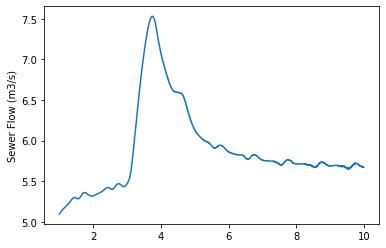

In [5]:
# Flow in sewer subsection (only)
# Units of m3/s (converted from ft3/s)
sewer_flow = storm.item().get('WRRF_flow') / 35.3147
plt.plot(storm.item().get('time'),sewer_flow)
plt.ylabel('Sewer Flow (m3/s)')

Text(0, 0.5, 'Sewer TSS Concentration (mg/L)')

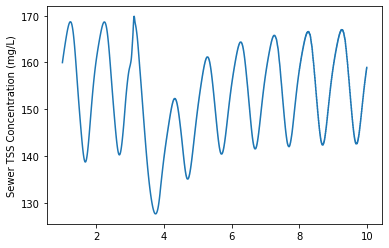

In [6]:
# TSS concentration in sewer subsection (only)
plt.plot(storm.item().get('time'),storm.item().get('WRRF_TSSConc'))
plt.ylabel('Sewer TSS Concentration (mg/L)')

Text(0, 0.5, 'NO CONTROL Sewer Flow (m3/s)')

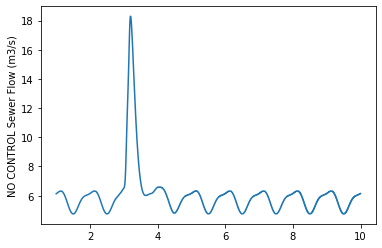

In [7]:
# Flow in sewer subsection (only)
# NO CONTROL results shown here
# Units of m3/s (converted from ft3/s)
plt.plot(storm_nocontrol.item().get('time'),storm_nocontrol.item().get('WRRF_flow') / 35.3147)
plt.ylabel('NO CONTROL Sewer Flow (m3/s)')

5.6676117925401055

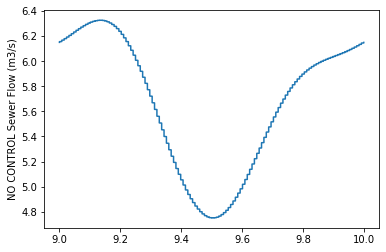

In [8]:
# Plot section that is dry-weather only
# Will average over this section to get dry-weather average value
# This is done for the NO CONTROL results shown above
# Units of m3/s (converted from ft3/s)
# Storm 1: 8:-1
# Storm 2: 0:1
# Storm 3: 0:1

dw_start = 8*24*60*60/10
dw_end = -1#1*24*60*60/10
plt.plot(storm_nocontrol.item().get('time')[int(dw_start):int(dw_end)],storm_nocontrol.item().get('WRRF_flow')[int(dw_start):int(dw_end)] / 35.3147)
plt.ylabel('NO CONTROL Sewer Flow (m3/s)')

# Units of m3/s
seweroutflow = np.mean(storm_nocontrol.item().get('WRRF_flow')[int(dw_start):int(dw_end)]) / 35.3147
seweroutflow

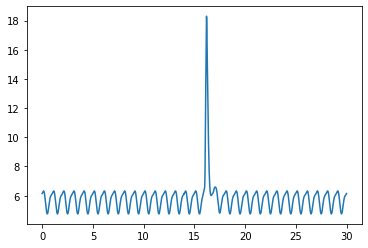

In [42]:
# IF NO CONTROL, RUN THIS

dw_flow_begin = []
dw_flow_end = []
dw_TSSConc_begin = []
dw_TSSConc_end = []
nodwdays_begin = 14
nodwdays_end = 7

# Storm 1: 10-1
# Storm 2: 53-35
# Storm 3: 37-28
nostormdays = 37-28

time_storm = np.linspace(0.,nodwdays_begin+nostormdays+nodwdays_end,num=int((nodwdays_begin+nostormdays+nodwdays_end)*24*60*60/10))

for _ in range(0,nodwdays_begin):
    dw_flow_begin = np.append(sewer_flow[int(dw_start):int(dw_start+24*60*60/10)],dw_flow_begin)
    dw_TSSConc_begin = np.append(storm.item().get('WRRF_TSSConc')[int(dw_start):int(dw_start+24*60*60/10)],dw_TSSConc_begin)

for _ in range(0,nodwdays_end):
    dw_flow_end = np.append(sewer_flow[int(dw_start):int(dw_start+24*60*60/10)],dw_flow_end)
    dw_TSSConc_end = np.append(storm.item().get('WRRF_TSSConc')[int(dw_start):int(dw_start+24*60*60/10)],dw_TSSConc_end)

sewer_flow = np.append(dw_flow_begin,np.append(sewer_flow,dw_flow_end))
WRRF_TSSConc = np.append(dw_TSSConc_begin,np.append(storm.item().get('WRRF_TSSConc'),dw_TSSConc_end))

plt.plot(time_storm,sewer_flow)

In [ ]:
plt.plot(time_storm[0:nodwdays_begin*8640],dw_flow_begin)
plt.plot(time_storm[0:nostormdays*8640],sewer_flow[nodwdays_begin*8640:(nodwdays_begin+nostormdays)*8640])
#plt.xlim((2.,2.3))

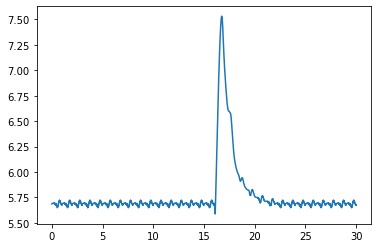

In [9]:
# IF CONTROL AND STORM 1, RUN THIS
# Need for pre-storm and storm flow, etc. to line up

dw_flow_begin = []
dw_flow_end = []
dw_TSSConc_begin = []
dw_TSSConc_end = []
nodwdays_begin = 14
nodwdays_end = 7

# Storm 1: 10-1
# Storm 2: 53-35
# Storm 3: 37-28
nostormdays = 10-1

# Storm 1: 2.1
# Storm 2: RUN ABOVE 'NO CONTROL' CELL; NO EXTRA BIT
# Storm 3: RUN ABOVE 'NO CONTROL' CELL; NO EXTRA BIT
extra_bit = 2.1

time_storm = np.linspace(0.,nodwdays_begin+nostormdays+nodwdays_end,num=int((nodwdays_begin+nostormdays+nodwdays_end)*24*60*60/10))

for _ in range(0,nodwdays_begin):
    dw_flow_begin = np.append(sewer_flow[int(dw_start):int(dw_start+24*60*60/10)],dw_flow_begin)
    dw_TSSConc_begin = np.append(storm.item().get('WRRF_TSSConc')[int(dw_start):int(dw_start+24*60*60/10)],dw_TSSConc_begin)
dw_flow_begin = np.append(dw_flow_begin,dw_flow_begin[0:int(extra_bit*24*60*60/10+1)])
dw_TSSConc_begin = np.append(dw_TSSConc_begin,dw_TSSConc_begin[0:int(extra_bit*24*60*60/10+1)])

for _ in range(0,nodwdays_end):
    dw_flow_end = np.append(sewer_flow[int(dw_start):int(dw_start+24*60*60/10)],dw_flow_end)
    dw_TSSConc_end = np.append(storm.item().get('WRRF_TSSConc')[int(dw_start):int(dw_start+24*60*60/10)],dw_TSSConc_end)

sewer_flow = sewer_flow[int(extra_bit*24*60*60/10):-1]
WRRF_TSSConc = storm.item().get('WRRF_TSSConc')[int(extra_bit*24*60*60/10):-1]

sewer_flow = np.append(dw_flow_begin,np.append(sewer_flow,dw_flow_end))
WRRF_TSSConc = np.append(dw_TSSConc_begin,np.append(WRRF_TSSConc,dw_TSSConc_end))

plt.plot(time_storm,sewer_flow)

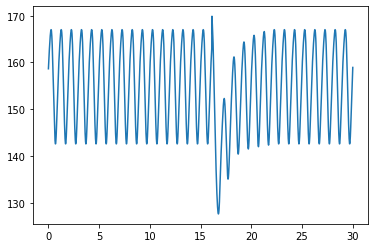

In [10]:
plt.plot(time_storm,WRRF_TSSConc)

In [11]:
### OLD Using ./data/flowPrecip.xlsx average dry-weather WRRF inflow is about 520.30 Mgal/d (1,969,500 m3/d, )
### OLD Average WRRF inflow is 2,788,860 m3/d

# Using GLWA WRRF model, steady-state flow is 2,100,000 m3/d
# Converting m3/d to m3/s ...
WRRFinflow = 2100000 / 86400
WRRFinflow

24.305555555555557

In [12]:
# Ratio to scale from sewer subsection to GLWA WRRF influent
# Ratio should be about 4.2885
scale_ratio = WRRFinflow/seweroutflow
scale_ratio

4.288500420502921

Text(0, 0.5, 'WRRF Flow (m3/s)')

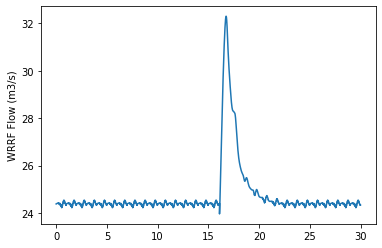

In [13]:
# Flow for GLWA WRRF influent
# Units of m3/s
plt.plot(time_storm,scale_ratio*sewer_flow)
plt.ylabel('WRRF Flow (m3/s)')

(0, 7000000)

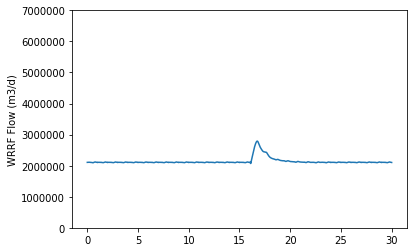

In [14]:
# Need flow for GLWA WRRF influent in units of m3/d (converted from m3/s)
WRRF_flow = scale_ratio*sewer_flow * 86400

plt.plot(time_storm,WRRF_flow)
plt.ylabel('WRRF Flow (m3/d)')
plt.ylim((0,7000000))

Text(0, 0.5, 'WRRF TSS Concentration (mg/L)')

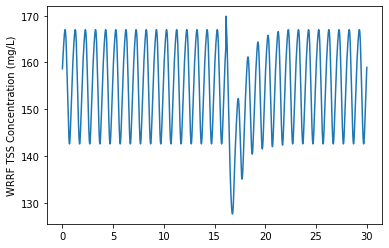

In [15]:
# TSS concentration for GLWA WRRF influent (same as that for sewer subsection since concentration)
plt.plot(time_storm,WRRF_TSSConc)
plt.ylabel('WRRF TSS Concentration (mg/L)')

In [16]:
# Using GLWA WRRF model, steady-state ...
# flow is 2,100,000 m3/d,
# TCOD is 210 mg TCOD/L,
# TKN is 20 mg N/L,
# influent TP is 2.2 mg P/L, 
# fraction of PO4 in TP is 53.3%, so influent SP is 1.1726 mg P/L,
# temperature is 10 C

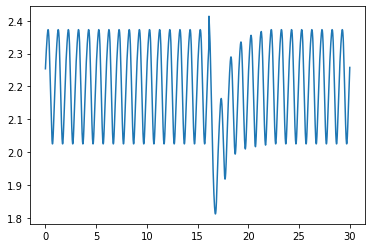

In [17]:
# For simplification, TCOD, TKN, and TP will mirror TSS dynamics
# TP will only include total phosphorus without fractionation
# The fraction of PO4 in TP will be kept at a constant value of 53.5%
# Temperature will be a constant value of 10 C

# TCOD concentration in mg/L
WRRF_TCODConc = WRRF_TSSConc / np.mean(WRRF_TSSConc) * 210

# TKN concentration in mg/L
WRRF_TKNConc = WRRF_TSSConc / np.mean(WRRF_TSSConc) * 20

# TP concentration in mg/L
WRRF_TPConc = WRRF_TSSConc / np.mean(WRRF_TSSConc) * 2.2

# PO4 in TP in fraction
WRRF_frPO4TP = 0.533*np.ones_like(WRRF_TSSConc)

# Temperature in C
WRRF_T = 10*np.ones_like(WRRF_TSSConc)

# Non-influent related items

# Fe mass dose in kg/d
# For base-case, set as zero
Femass = np.zeros_like(WRRF_TSSConc)

# Primary clarifier solids fraction removal in fraction
# Assume steady-state of 70%
fXTSS_sludge = 0.7*np.ones_like(WRRF_TSSConc)

# Primary clarifier sludge flow in m3/d
# Assume steady-state of 20,000 m3/d
Qsludge_target = 20000*np.ones_like(WRRF_TSSConc)

plt.plot(time_storm,WRRF_TPConc)

In [18]:
# Subsample: every 10 seconds down to every 30 minutes (1800s) (only include every 180th element)
storm_df = pd.DataFrame(data=np.column_stack((time_storm[0::180], # d
                                        WRRF_flow[0::180], # m3/d
                                        WRRF_TCODConc[0::180], # mg/L
                                        WRRF_TKNConc[0::180], # mg/L
                                        WRRF_TPConc[0::180], # mg/L
                                        WRRF_frPO4TP[0::180], # fraction
                                        WRRF_T[0::180], # C
                                        Femass[0::180], # kg/d
                                        fXTSS_sludge[0::180], # fraction
                                        Qsludge_target[0::180])), # m3/d
                  columns=['Sumo__Time',
                           'Sumo__Plant__Influent__param__Q',
                           'Sumo__Plant__Influent__param__TCOD',
                           'Sumo__Plant__Influent__param__TKN',
                           'Sumo__Plant__Influent__param__TP',
                           'Sumo__Plant__Influent__param__frSPO4_TP',
                           'Sumo__Plant__Influent__param__T',
                           'Sumo__Plant__Metal1__param__Femass',
                           'Sumo__Plant__Primary1__param__fXTSS_sludge',
                           'Sumo__Plant__Primary1__param__Qsludge_target'])
storm_df

,Sumo__Time,Sumo__Plant__Influent__param__Q,Sumo__Plant__Influent__param__TCOD,Sumo__Plant__Influent__param__TKN,Sumo__Plant__Influent__param__TP,Sumo__Plant__Influent__param__frSPO4_TP,Sumo__Plant__Influent__param__T,Sumo__Plant__Metal1__param__Femass,Sumo__Plant__Primary1__param__fXTSS_sludge,Sumo__Plant__Primary1__param__Qsludge_target
0,0.000000,2.106552e+06,215.139546,20.489481,2.253843,0.533,10.0,0.0,0.7,20000.0
1,0.020833,2.106934e+06,216.494148,20.618490,2.268034,0.533,10.0,0.0,0.7,20000.0
2,0.041667,2.107242e+06,217.773253,20.740310,2.281434,0.533,10.0,0.0,0.7,20000.0
3,0.062500,2.107784e+06,218.988366,20.856035,2.294164,0.533,10.0,0.0,0.7,20000.0
4,0.083334,2.108290e+06,220.133087,20.965056,2.306156,0.533,10.0,0.0,0.7,20000.0
...,...,...,...,...,...,...,...,...,...,...
1435,29.895949,2.108050e+06,207.255215,19.738592,2.171245,0.533,10.0,0.0,0.7,20000.0
1436,29.916782,2.106960e+06,209.131408,19.917277,2.190900,0.533,10.0,0.0,0.7,20000.0
1437,29.937616,2.105704e+06,210.895648,20.085300,2.209383,0.533,10.0,0.0,0.7,20000.0
1438,29.958449,2.101979e+06,212.517322,20.239745,2.226372,0.533,10.0,0.0,0.7,20000.0


In [19]:
with open(w_influentTSV,'w') as write_tsv:
    write_tsv.write(storm_df.to_csv(sep='\t', index=False))